# MA124 Maths by Computer: Assignment 2

This assignment will investigate the SIR model and how different situations can flatten the curve. This highlights our current situation with Covid-19 and the different approaches to tackle the infectious disease. In particular it can be used to understand interventions that [flatten the curve](https://en.wikipedia.org/wiki/Flattening_the_curve).

## The SIR model

The [SIR model](https://en.wikipedia.org/wiki/Compartmental_models_in_epidemiology#The_SIR_model)  is given by the following system of ODEs

$$
\dot S  = - \frac{\beta S I}{N}, \quad 
\dot I  = \frac{\beta S I}{N} - \gamma I, \quad 
\dot R  = \gamma I,
$$

where $S$ is the number of susceptible individuals, $I$ is the number of infectious individuals, $R$ is the number of recovered or removed individuals. $N$ is the total number of individuals, i.e. $N = S+I+R$. One can easily verify that $\dot N = 0$ by adding the three equations. Hence $N$ is constant. $\beta$ and $\gamma$ are parameters: $\beta$ is the average number of contacts per person per time, $\gamma$ is the reciprocal of the time an individual remains infectious. 

The basic reproduction ratio is given by $\displaystyle{R_0 = \frac{\beta}{\gamma}}$.

## Part A. Baseline Case

This case will set out baseline in order to do comparisons later. The parameters for the baseline case are as follows; $\beta = 0.3$, and $\gamma = 0.1$, which corresponds to $R_0 = 3$, along with the initial conditions $S(0) = 10^6 - 5$, $I(0) = 5$, and $R(0) = 0$. This gives us a total population, $N$, of 1,000,000. 

In [13]:
# --- Import libraries --- #

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [14]:
# --- First define the RHS of ODE system --- #

def SIR(y, t):
    # returns RHS of the SIR model
    S, I, R = y

    beta = 0.3
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [15]:
# --- Problem setup --- #

# set up time grid for solution
tf = 180
Nsteps = 1800
t= np.linspace(0, tf, Nsteps+1)

# Set initial conditions and put into array y0
S0 = 10.0**6 - 5
I0 = 5
R0 = 0
y0 = np.array([S0, I0, R0])

In [16]:
# --- Call the ODE solver and extract solutions --- #
  
y_sol = odeint(SIR, y0, t)

# extract S, I, R from the solution array y
S = y_sol[:,0]
I = y_sol[:,1]
R = y_sol[:,2]

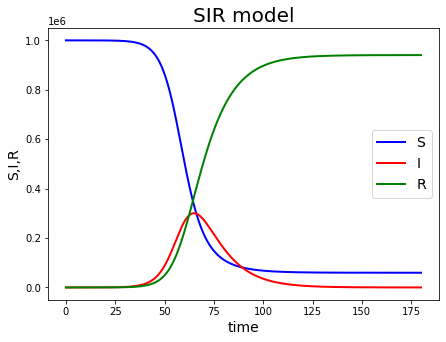

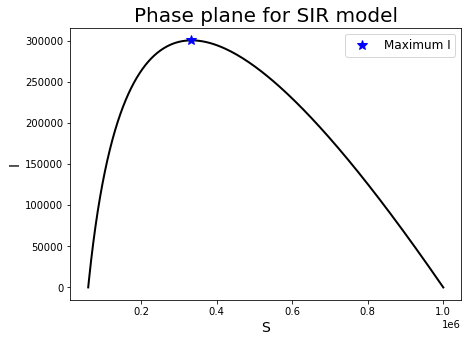

At the end of the simulation, the final value of S, I, and R are (rounded):
S(t=tf) = 59531
I(t=tf) = 51
R(t=tf) = 940418
The maximum I reached was 300464 when the population, S, was 332721 (both were rounded)


In [17]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.figure(figsize=(7,5))
plt.plot(t, S, "b-", lw = 2, label="S")
plt.plot(t, I, "r-", lw = 2, label="I")
plt.plot(t, R, "g-", lw = 2, label="R")

# Graph settings
plt.xlabel("time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=20)
plt.legend(fontsize=14)
plt.show()        

# --- Ploting the evolution in the S,I phase plane --- #
plt.figure(figsize=(7,5))
plt.plot(S, I, "k-", lw = 2)

# Markers to show max infection rate
# np.argmax returns the index of the maximum value along an axis and np.max returns the maximum of an array
Imax = np.amax(I)
Smax = S[np.argmax(I)]
plt.plot(Smax, Imax , 'b*', markersize = 10, label = "Maximum I")

# Graph settings
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=20)
plt.legend(fontsize=14, prop={'size': 12})
plt.show()

# --- Report the final values of S, I, R and the max I.  --- #
print("At the end of the simulation, the final value of S, I, and R are (rounded):")
print("S(t=tf) =", round(S[-1]))
print("I(t=tf) =", round(I[-1]))
print("R(t=tf) =", round(R[-1]))
print("The maximum I reached was", round(Imax), "when the population, S, was", round(Smax),"(both were rounded)")

The figures above show the base case for the SIR model and a phase plane with S and I. The SIR model begins with 5 infected in a susceptible population of 999,995. We can see from the printed statement that the infected population reached 300,464 and by the end of the simulation over 94% of the population was recovered. As there was zero people beginning in the $R$ class, that means this 94% of the population were previously susceptible, become infected, and then recoverd over the time in the simulation. The susceptible population is less than 6% and the infected population has 51 individuals which very little compared to the peak.


## Part B. Prior Immunity
In this scenario, we are assuming some percentage of the population has prior immunity, whether it is from having prior natural immunity or being vaccinated, are already considered part of the $R$ class and are not susceptible to the infection. To compare to the baseline case, we use the same parameter values and total population size.

In [18]:
# --- Use the same SIR function as above --- # 

# --- Problem setup --- #

# Same set up time grid as baseline case

# Set initial conditions and put into array y0vac (vac for vaccinated and to differentiate between baseline)
R0vac = 10**6 * 0.2
I0vac = 5
S0vac = 10.0**6 - I0vac - R0vac
y0vac = np.array([S0vac, I0vac, R0vac])

In [19]:
# --- Call the ODE solver and extract solutions --- #
  
y_solvac = odeint(SIR, y0vac, t)

# extract S, I, R from the solution array y
Svac = y_solvac[:,0]
Ivac = y_solvac[:,1]
Rvac = y_solvac[:,2]

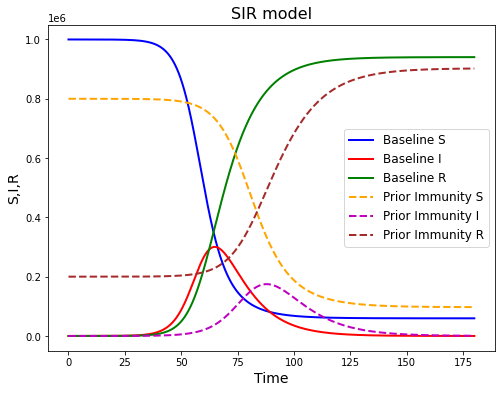

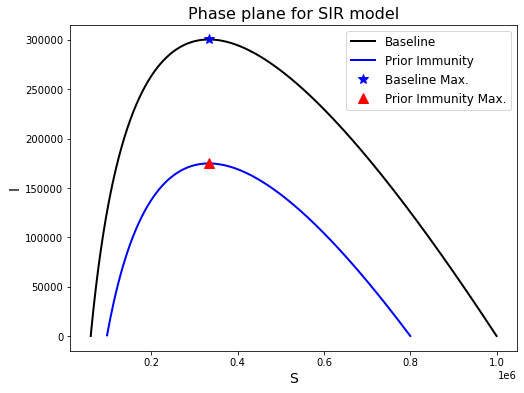

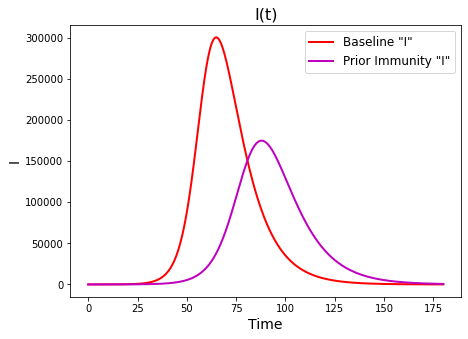

At the end of the simulation, the final value of S, I, and R under the new case are (rounded):
S(t=tf) = 97384
I(t=tf) = 635
R(t=tf) = 901982
The maximum baseline I reached was 300464 when the baseline population, S, was 332721 (both were rounded)
The new maximum I reached was 174846 when the population, S, was 332927 (both were also rounded)


In [20]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.figure(figsize=(8,6))
plt.plot(t, S, "b-", lw = 2, label="Baseline S")
plt.plot(t, I, "r-", lw = 2, label="Baseline I")
plt.plot(t, R, "g-", lw = 2, label="Baseline R")
plt.plot(t, Svac, "--", color = "orange", lw = 2, label="Prior Immunity S")
plt.plot(t, Ivac, "m--", lw = 2, label="Prior Immunity I")
plt.plot(t, Rvac, "--", color = "brown", lw = 2, label="Prior Immunity R")

# Graph settings
plt.xlabel("Time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14, prop={'size': 12})
plt.show()        

# --- Ploting the evolution in the S,I phase plane --- #
plt.figure(figsize=(8,6))
plt.plot(S, I, "k-", lw = 2, label = "Baseline")
plt.plot(Svac, Ivac, "b-", lw = 2, label = "Prior Immunity")

# Markers to show max infection rate
# np.argmax returns the index of the maximum value along an axis and np.max returns the maximum of an array
Ivacmax = np.amax(Ivac)
Svacmax = Svac[np.argmax(Ivac)]
plt.plot(Smax, Imax , 'b*', markersize = 10, label = "Baseline Max.")
plt.plot(Svacmax, Ivacmax, "r^", markersize = 10, label = "Prior Immunity Max.")

# Graph settings
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)
plt.legend(fontsize=14, prop={'size': 12})
plt.show()

# --- Plot time series for I(t) ---#
plt.figure(figsize=(7,5))
plt.plot(t, I, "r-", lw = 2, label="Baseline \"I\"")
plt.plot(t, Ivac, "m-", lw = 2, label="Prior Immunity \"I\"")

# Graph settings
plt.xlabel("Time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("I(t)", fontsize=16)
plt.legend(fontsize=14, prop={'size': 12})
plt.show()

# --- Report the final values of S, I, R and the max I.  --- #
print("At the end of the simulation, the final value of S, I, and R under the new case are (rounded):")
print("S(t=tf) =", round(Svac[-1]))
print("I(t=tf) =", round(Ivac[-1]))
print("R(t=tf) =", round(Rvac[-1]))
print("The maximum baseline I reached was", round(Imax), "when the baseline population, S, was", round(Smax),"(both were rounded)")
print("The new maximum I reached was", round(Ivacmax), "when the population, S, was", round(Svacmax),"(both were also rounded)")

The SIR model figure shows the baseline along with the new scenario where I chose 20% of the population to already be in the $R$ class. We can see in the first figure that the initial number of $S$ of this case is lower than the baseline as we have a recovered population already; shown by the initial $R$ being higher compared to the base case. Having 20% of the population already in the $R$ class also caused the maximum number of infected to only reach 174,846, less than two-thirds of what the baseline maximum was. This highlights how there was a "flattening" of the curve. The phase plane figure and the last figure shows this clearly. There was also a later peak which could potentially means a greater time for medical equipment to be produced to keep up with the increased number of paitents in hospitals.

## Part C. Social Distancing / Mask Mandate

In this model, we are implementing a social distancing policy or mask mandate (we will take the scenario where there is a mask mandate for the purposes of labelling)  that will affect the parameter $\beta$ which controls the rate of infection. I will choose a $t_m$ for which the policy will take into effect for 30-days and after which will be lifted. 

In [21]:
# --- First define the RHS of ODE system --- #

def SIRsd(y, t):
    # returns RHS of the SIR model taking into account when a mask mandate is implemented
    S, I, R = y
    tm = 43
    
    if t <= tm:
        beta = 0.3
    elif tm < t <= tm + 30:
        beta = 0.24
    else:
        beta = 0.3
    
    gamma = 0.1
    
    N = S + I + R
    Sdot = -beta * S * I / N
    Idot = beta * S * I / N - gamma * I
    Rdot = gamma * I
    
    return Sdot, Idot, Rdot

In [22]:
# --- Use the same SIR function as above --- # 

# --- Problem setup --- #

# Same set up time grid as baseline case

# Set initial conditions and put into array y0mask ("_"0mask to differentiate between baseline)
R0mask = 0
I0mask = 5
S0mask = 10.0**6 - 5
y0mask = np.array([S0mask, I0mask, R0mask])

In [23]:
# --- Call the ODE solver and extract solutions --- #
  
y_solmask = odeint(SIRsd, y0mask, t)

# extract S, I, R from the solution array y
Smask = y_solmask[:,0]
Imask = y_solmask[:,1]
Rmask = y_solmask[:,2]

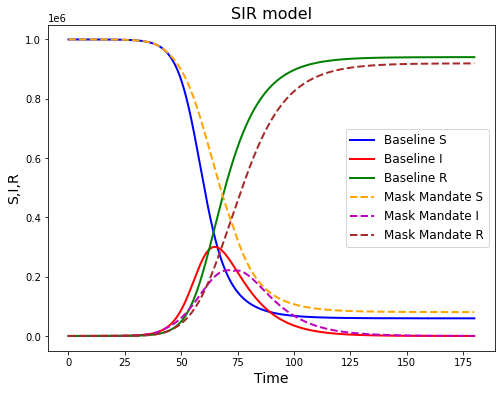

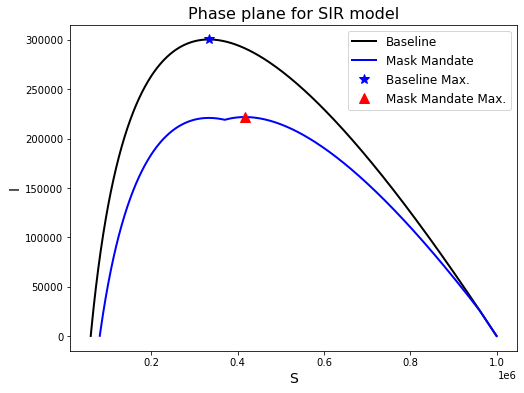

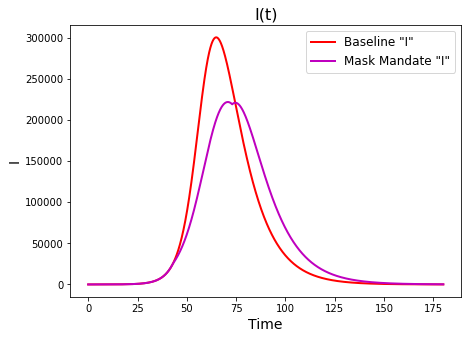

At the end of the simulation, the final value of S, I, and R under the new case are (rounded):
S(t=tf) = 80500
I(t=tf) = 174
R(t=tf) = 919326
The maximum baseline I reached was 300464 when the baseline population, S, was 332721 (both were rounded)
The new maximum I reached was 221851 when the population, S, was 416102 (both were also rounded)


In [24]:
# --- Plot various interesting things --- #

# plot the time evolution of the S, I, R
plt.figure(figsize=(8,6))
plt.plot(t, S, "b-", lw = 2, label="Baseline S")
plt.plot(t, I, "r-", lw = 2, label="Baseline I")
plt.plot(t, R, "g-", lw = 2, label="Baseline R")
plt.plot(t, Smask, "--", color = "orange", lw = 2, label="Mask Mandate S")
plt.plot(t, Imask, "m--", lw = 2, label="Mask Mandate I")
plt.plot(t, Rmask, "--", color = "brown", lw = 2, label="Mask Mandate R")

# Graph settings
plt.xlabel("Time", fontsize=14)
plt.ylabel("S,I,R", fontsize=14)
plt.title("SIR model", fontsize=16)
plt.legend(fontsize=14, prop={'size': 12})
plt.show()        

# --- Ploting the evolution in the S,I phase plane --- #
plt.figure(figsize=(8,6))
plt.plot(S, I, "k-", lw = 2, label = "Baseline")
plt.plot(Smask, Imask, "b-", lw = 2, label = "Mask Mandate")

# Markers to show max infection rate
# np.argmax returns the index of the maximum value along an axis and np.max returns the maximum of an array
Imaskmax = np.amax(Imask)
Smaskmax = Smask[np.argmax(Imask)]
plt.plot(Smax, Imax , 'b*', markersize = 10, label = "Baseline Max.")
plt.plot(Smaskmax, Imaskmax, "r^", markersize = 10, label = "Mask Mandate Max.")

# Graph settings
plt.xlabel("S", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("Phase plane for SIR model", fontsize=16)
plt.legend(fontsize=14, prop={'size': 12})
plt.show()

# --- Plot time series for I(t) ---#
plt.figure(figsize=(7,5))
plt.plot(t, I, "r-", lw = 2, label="Baseline \"I\"")
plt.plot(t, Imask, "m-", lw = 2, label="Mask Mandate \"I\"")

# Graph settings
plt.xlabel("Time", fontsize=14)
plt.ylabel("I", fontsize=14)
plt.title("I(t)", fontsize=16)
plt.legend(fontsize=14, prop={'size': 12})
plt.show()

# --- Report the final values of S, I, R and the max I.  --- #
print("At the end of the simulation, the final value of S, I, and R under the new case are (rounded):")
print("S(t=tf) =", round(Smask[-1]))
print("I(t=tf) =", round(Imask[-1]))
print("R(t=tf) =", round(Rmask[-1]))
print("The maximum baseline I reached was", round(Imax), "when the baseline population, S, was", round(Smax),"(both were rounded)")
print("The new maximum I reached was", round(Imaskmax), "when the population, S, was", round(Smaskmax),"(both were also rounded)")

In the figures above, the mask mandate was implemented on day 43; this reduced the spread of the disease and reduced the peak to over two-thirds of the baseline maximum. This shows that the effect of the mask mandate takes time to have an impact as the peak was around day 75. We can also observe a small dip in the infection curve and this is the mask mandate being lifted which causes the beta to increase, thus increasing the the infection rate but as population of the class $S$ has decreased, there isn't a massive rise. Similar to the prior immunity, the mask mandate also "flattens" the curve as we can clearly see in the bottom two diagrams.

## Final Notes
When comparing to the baseline case, both prior immunity and a mask mandate flattens the curve which is expected. However these simulations do not take into account many other factors but are generally good for understanding how different scenarios can play out in a simulation with a smaller impact in the real world. 